### Symulacja procesu kolejkowego na podstawie procesu poissona

1. lambaA = 1/20, lambdaS = 1/15
2. lambaA = 1/20, lambdaS = 1/100
3. lambaA = 1/20, lambdaS = 1/5

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def generate_time(l):
  return -np.log(1 - np.random.uniform(0, 1)) / l

In [8]:
def simulate_process(limit, l_a, l_s):
  time = 0
  queue = 0
  completed_tasks = 0

  report_times = []
  report_tasks_in_queue = []
  report_completed_tasks = []

  task_arrival_time = generate_time(l_a)
  task_dequeue_time = task_arrival_time
  task_completion_time = task_dequeue_time + 1 # fake value
  while time <= limit:
    if time == task_arrival_time:
      queue += 1
      task_arrival_time += generate_time(l_a)

    if time == task_completion_time:
      completed_tasks += 1

    if time == task_dequeue_time:
      queue -= 1
      task_completion_time = time + generate_time(l_s)

      if queue > 0:
        task_dequeue_time = task_completion_time
      else:
        task_dequeue_time = max(task_completion_time, task_arrival_time)

    report_times.append(time)
    report_tasks_in_queue.append(queue)
    report_completed_tasks.append(completed_tasks)

    time = min(task_arrival_time, task_dequeue_time, task_completion_time) if time != task_completion_time else min(task_arrival_time, task_dequeue_time)

  return report_times, report_tasks_in_queue, report_completed_tasks

In [9]:
l_s = [1/15, 1/100, 1/5]
l_a = 1/20
limit = 1000

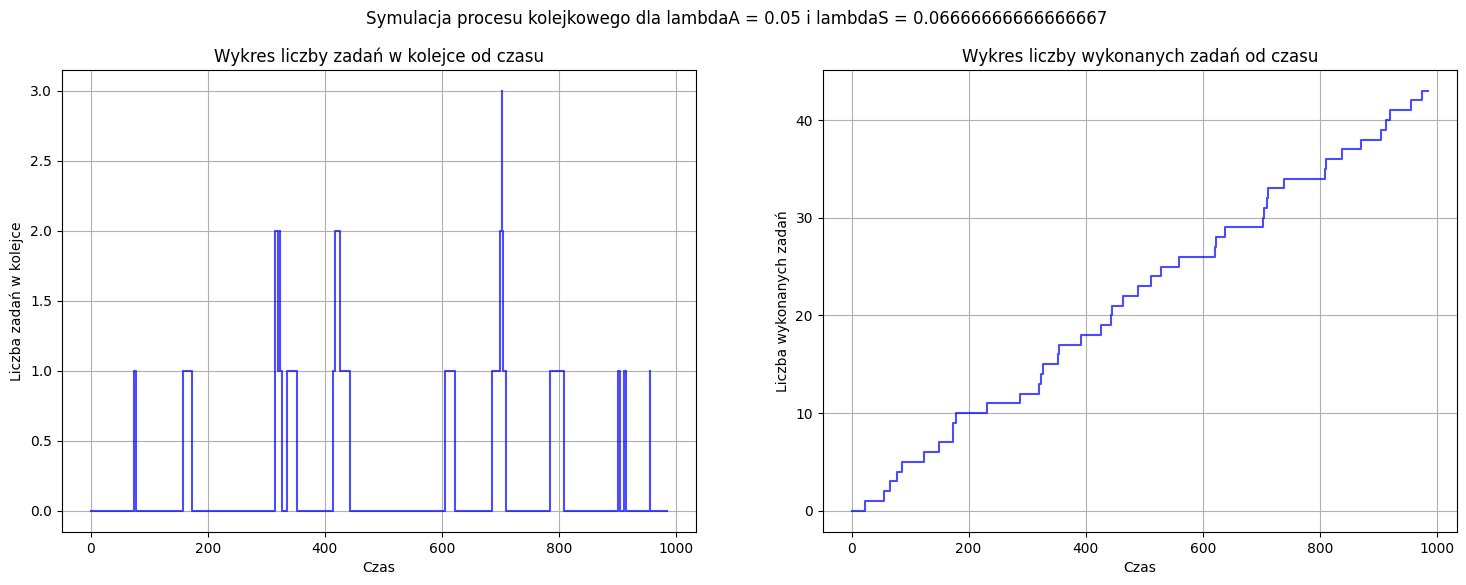

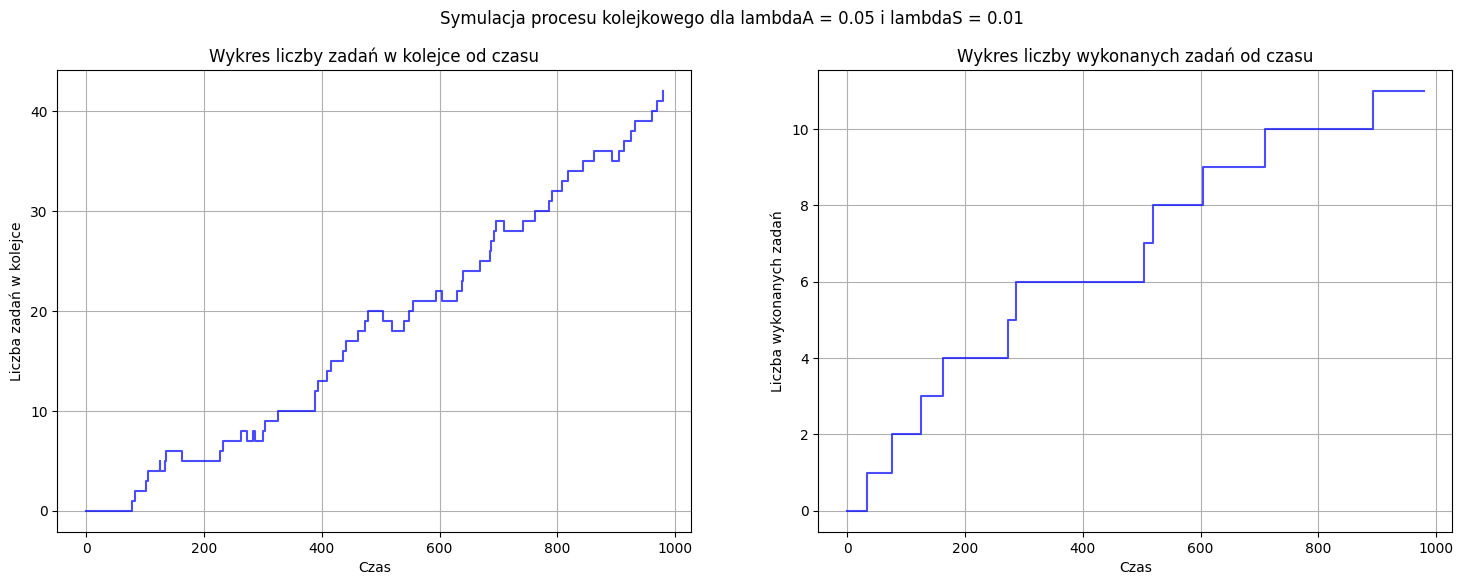

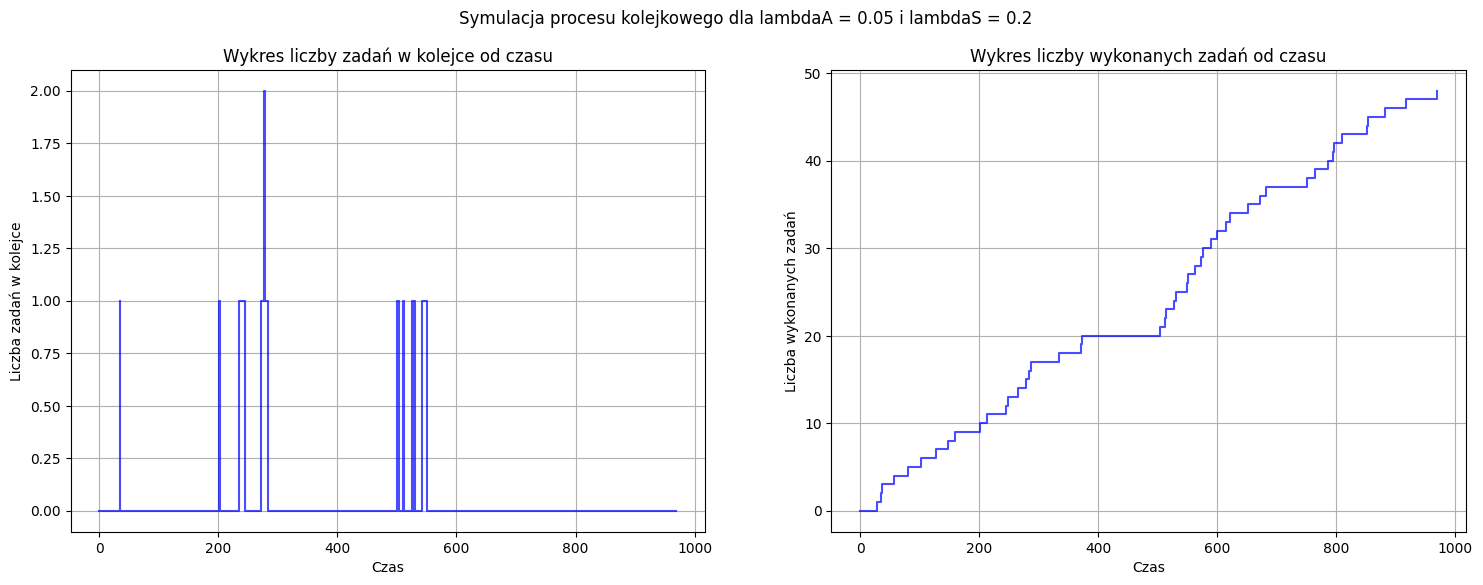

In [10]:
for ls in l_s:
  times, tasks_in_queue, completed_tasks = simulate_process(limit, l_a, ls)

  fig, axes = plt.subplots(1, 2, figsize=(18, 6))
  fig.suptitle(f'Symulacja procesu kolejkowego dla lambdaA = {l_a} i lambdaS = {ls}')

  queue_ax = axes[0]
  queue_ax.step(times, tasks_in_queue, color='blue', alpha=0.7, where='post')
  queue_ax.set_title('Wykres liczby zadań w kolejce od czasu')
  queue_ax.set_xlabel('Czas')
  queue_ax.set_ylabel('Liczba zadań w kolejce')
  queue_ax.grid(True)

  completed_ax = axes[1]
  completed_ax.step(times, completed_tasks, color='blue', alpha=0.7, where='post')
  completed_ax.set_title('Wykres liczby wykonanych zadań od czasu')
  completed_ax.set_xlabel('Czas')
  completed_ax.set_ylabel('Liczba wykonanych zadań')
  completed_ax.grid(True)